In [ ]:
import pandas as pd
import numpy  as np

### import plotting libraries


import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

### import preprosesing , modeling and evaluating  libraries.
from sklearn.impute import KNNImputer
from sklearn import metrics
from scipy.stats import  shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from xgboost import XGBClassifier


### Import the data
diabetes  = pd.read_csv('/content/drive/MyDrive/Diabetes.csv')
diabetes.head(10)
diabetes.shape

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(768, 9)

## **Exploratory Data Analysis**

1.	Data Understanding
Before going in to preprocessing and other processes one should understand the general description of the data. This stage includes overviewing the statistical description of the data, the nature of the features with respect to their type, shape of the data frame and the find out the presence of null and duplicate values to determine the next step.


In [ ]:
def explore(x):
    divider = "="
    print("\n {} \n".format((divider*100))) 
    print("Dataframe Makeup \n") 
    x.info() 
    print("\n {} \n".format((divider*100))) 
    print("Descriptive Statistics \n\n", x.describe()) 
    print("\n {} \n".format((divider*20))) 
    print("Shape of dataframe: {}".format(x.shape)) 
    print("\n {} \n".format((divider*100))) 
    print("Null values \n\n", x.isna().sum()) 
    print("\n {} \n".format((divider*100))) 
    print("Duplicates \n\n", x.duplicated().sum()) 
    return
explore(diabetes) 



Dataframe Makeup 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Descriptive Statistics 

        Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3

### Data cleaning

One can notice that there is zero values in some columns, Due to the fact that some values cannot be zero, before continuing with the Descriptive analysis and model building, we should replace zero values that do not make sense in some features ('Glucose','BloodPressure','SkinThickness','Insulin','BMI').
 There are different way of replacing values such as simple dropping it, Imputation Using (Mean/Median) Values, Imputation Using k-NN, Imputation Using Multivariate Imputation by Chained Equation (MICE),or using techniques from deep learning.
 Before that let replace these zero values with NAN values.


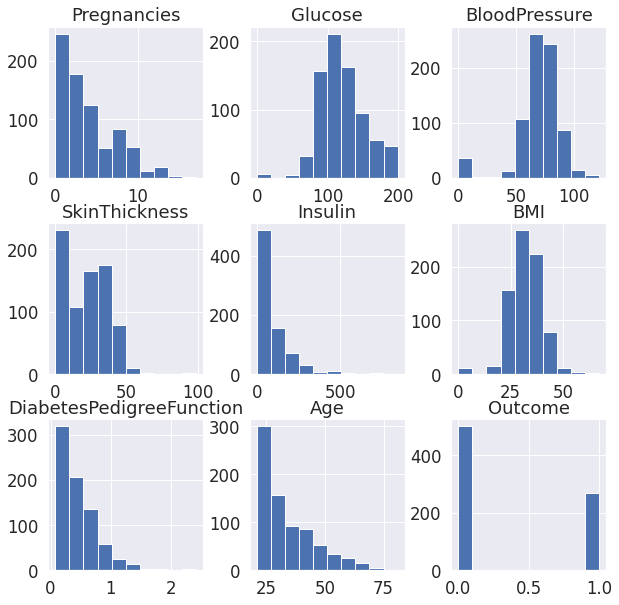

In [ ]:
diabetes.hist(figsize = (10,10))
plt.show()

Before the imputation lets try to replace zero values with Na and try to remove some outliers that can be identified visually from the above histogram.

In [ ]:
diabetes[diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]==0] = np.nan
diabetes.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
diabetes = diabetes[diabetes['Glucose']>40]
diabetes = diabetes[diabetes['BloodPressure']>40]

diabetes.shape

(723, 9)

Based on the the amount of nan for each column , it will be an appropriat idea to use different Imputation methods so that the model is more generalized in order to make educational guess.
 

*   for Glucose , Blood Pressure and BMI we will use  Imputation Using Mean/Median (Univariant Imputation )
*   for Insulin  and SkinThickness we will use Multi variant imputation by using KNNimputer that can predict the missing values based on other features. 






In [ ]:
diabetes['Glucose'].fillna(diabetes['Glucose'].mean(),inplace = True)
diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].mean(),inplace = True)
diabetes['BMI'].fillna(diabetes['BMI'].mean(),inplace = True)
diabetes.isna().sum()
diabetes.shape

(723, 9)

In [ ]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
diabetes_df = pd.DataFrame(imputer.fit_transform(diabetes))
diabetes_df = pd.DataFrame(diabetes_df)
diabetes_df.columns = diabetes.columns
diabetes_df.shape

(723, 9)

In [ ]:
diabetes_df.shape

(723, 9)

**Perform Descreptive analysis:**


---



---


This will Incluid -

1.   Cental tendency 
2.   Destribution 
3.   Depertion








**Statistical summary.**

---



---



In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,3.883817,121.988935,72.715076,29.147994,157.312586,32.425452,0.474373,33.432918,0.343015
std,3.365179,30.717954,11.960884,9.855688,106.605243,6.807897,0.328962,11.875246,0.475045
min,0.000000,44.000000,44.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,22.000000,86.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,130.000000,32.400000,0.378000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,35.500000,194.000000,36.550000,0.630000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_df.to_csv('Diabetes for tableau')

**Destribution.**

---



---



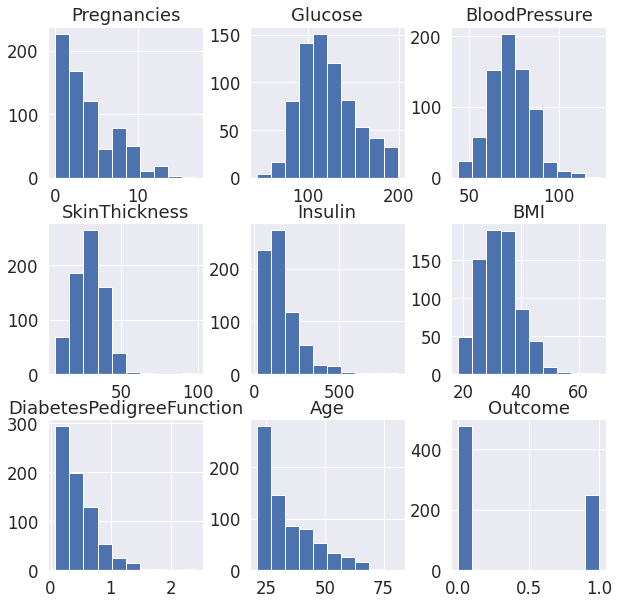

In [ ]:
diabetes_df.hist(figsize = (10,10))
plt.show()

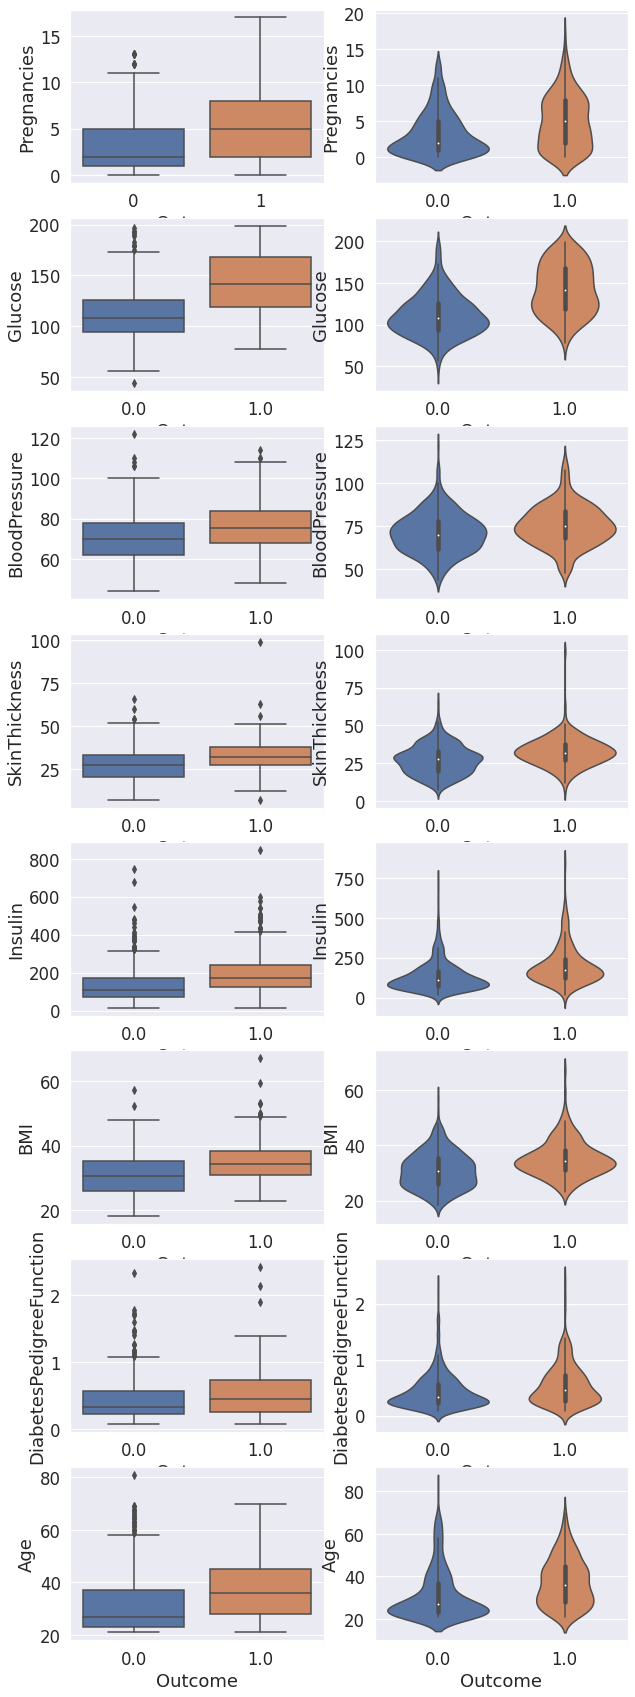

In [ ]:

fig, axes = plt.subplots(8, 2, figsize=(10,30))
sns.boxplot(ax=axes[0, 0], data=diabetes, x='Outcome', y='Pregnancies')
sns.violinplot(ax=axes[0, 1], data=diabetes_df, x='Outcome', y='Pregnancies')
sns.boxplot(ax=axes[1, 0], data=diabetes_df, x='Outcome', y='Glucose')
sns.violinplot(ax=axes[1, 1], data=diabetes_df, x='Outcome', y='Glucose')
sns.boxplot(ax=axes[2, 0], data=diabetes_df, x='Outcome', y='BloodPressure')
sns.violinplot(ax=axes[2, 1], data=diabetes_df, x='Outcome', y='BloodPressure')
sns.boxplot(ax=axes[3, 0], data=diabetes_df, x='Outcome', y='SkinThickness')
sns.violinplot(ax=axes[3, 1], data=diabetes_df, x='Outcome', y='SkinThickness')
sns.boxplot(ax=axes[4, 0], data=diabetes_df, x='Outcome', y='Insulin')
sns.violinplot(ax=axes[4, 1], data=diabetes_df, x='Outcome', y='Insulin')
sns.boxplot(ax=axes[5, 0], data=diabetes_df, x='Outcome', y='BMI')
sns.violinplot(ax=axes[5, 1], data=diabetes_df, x='Outcome', y='BMI')
sns.boxplot(ax=axes[6, 0], data=diabetes_df, x='Outcome', y='DiabetesPedigreeFunction')
sns.violinplot(ax=axes[6, 1], data=diabetes_df, x='Outcome', y='DiabetesPedigreeFunction')
sns.boxplot(ax=axes[7, 0], data=diabetes_df, x='Outcome', y='Age')
sns.violinplot(ax=axes[7, 1], data=diabetes_df, x='Outcome', y='Age')

plt.show()

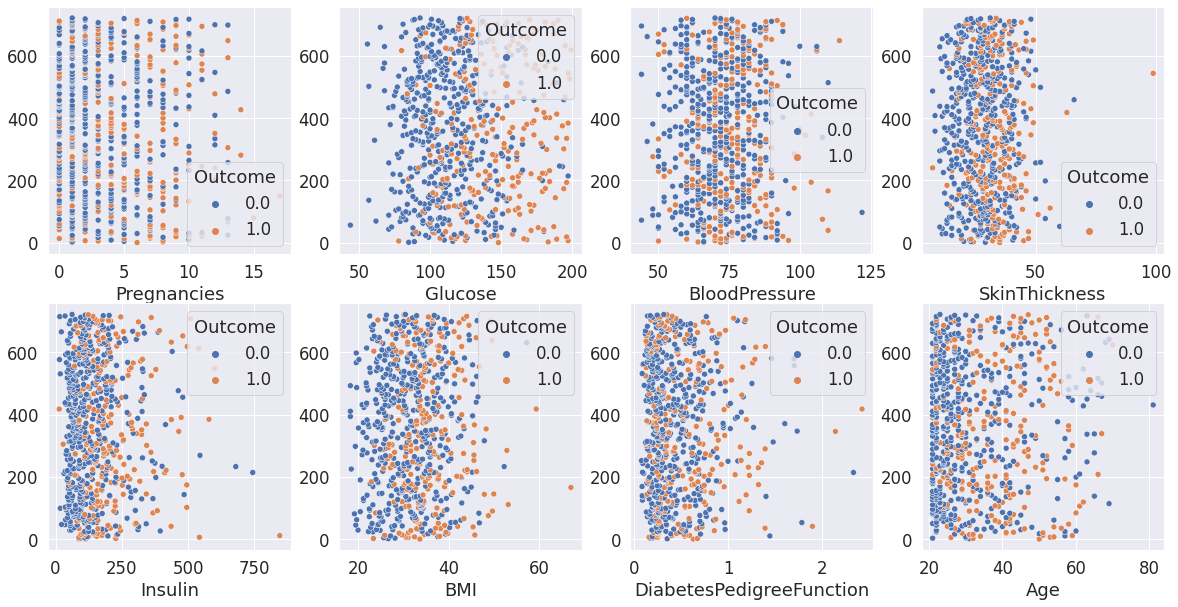

In [ ]:
fig, axes = plt.subplots(2,4,figsize=(20,10))
y = range(0,723)
sns.scatterplot(ax=axes[0, 0],data=diabetes_df, x='Pregnancies', hue='Outcome',y = y)
sns.scatterplot(ax=axes[0, 1],data=diabetes_df, x='Glucose',y = y, hue='Outcome')
sns.scatterplot(ax=axes[0, 2],data=diabetes_df, x='BloodPressure',y = y, hue='Outcome')
sns.scatterplot(ax=axes[0, 3],data=diabetes_df, x='SkinThickness',y = y, hue='Outcome')
sns.scatterplot(ax=axes[1, 0],data=diabetes_df, x='Insulin',y = y, hue='Outcome')
sns.scatterplot(ax=axes[1, 1],data=diabetes_df, x='BMI',y = y, hue='Outcome')
sns.scatterplot(ax=axes[1, 2],data=diabetes_df, x='DiabetesPedigreeFunction',y = y, hue='Outcome')
sns.scatterplot(ax=axes[1, 3],data=diabetes_df, x='Age',y = y, hue='Outcome')
plt.show()

In [ ]:
diabetes_0 = diabetes_df[diabetes_df['Outcome']==0]
diabetes_1 = diabetes_df[diabetes_df['Outcome']==1]
diabetes_0.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.0
mean,3.324211,111.132632,71.178947,27.373684,134.131579,30.981424,0.434074,31.324211,0.0
std,3.033592,25.018923,11.751272,9.622946,93.126565,6.536051,0.301803,11.697314,0.0
min,0.000000,44.000000,44.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.0
25%,1.000000,94.000000,62.000000,20.000000,71.000000,25.900000,0.233500,23.000000,0.0
50%,2.000000,108.000000,70.000000,27.500000,108.500000,30.500000,0.340000,27.000000,0.0
75%,5.000000,126.000000,78.000000,33.000000,169.000000,35.400000,0.571500,37.000000,0.0
max,13.000000,197.000000,122.000000,66.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [ ]:
diabetes_1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.0
mean,4.955645,142.782258,75.657258,32.546371,201.711694,35.191232,0.551560,37.471774,1.0
std,3.699498,29.936927,11.830084,9.411578,116.465875,6.465743,0.363901,11.167442,0.0
min,0.000000,78.000000,48.000000,7.000000,14.000000,22.900000,0.088000,21.000000,1.0
25%,2.000000,119.000000,68.000000,27.000000,125.750000,30.900000,0.263750,28.000000,1.0
50%,5.000000,142.000000,75.500000,32.000000,173.750000,34.200000,0.449000,36.000000,1.0
75%,8.000000,168.000000,84.000000,37.625000,240.875000,38.250000,0.731250,45.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


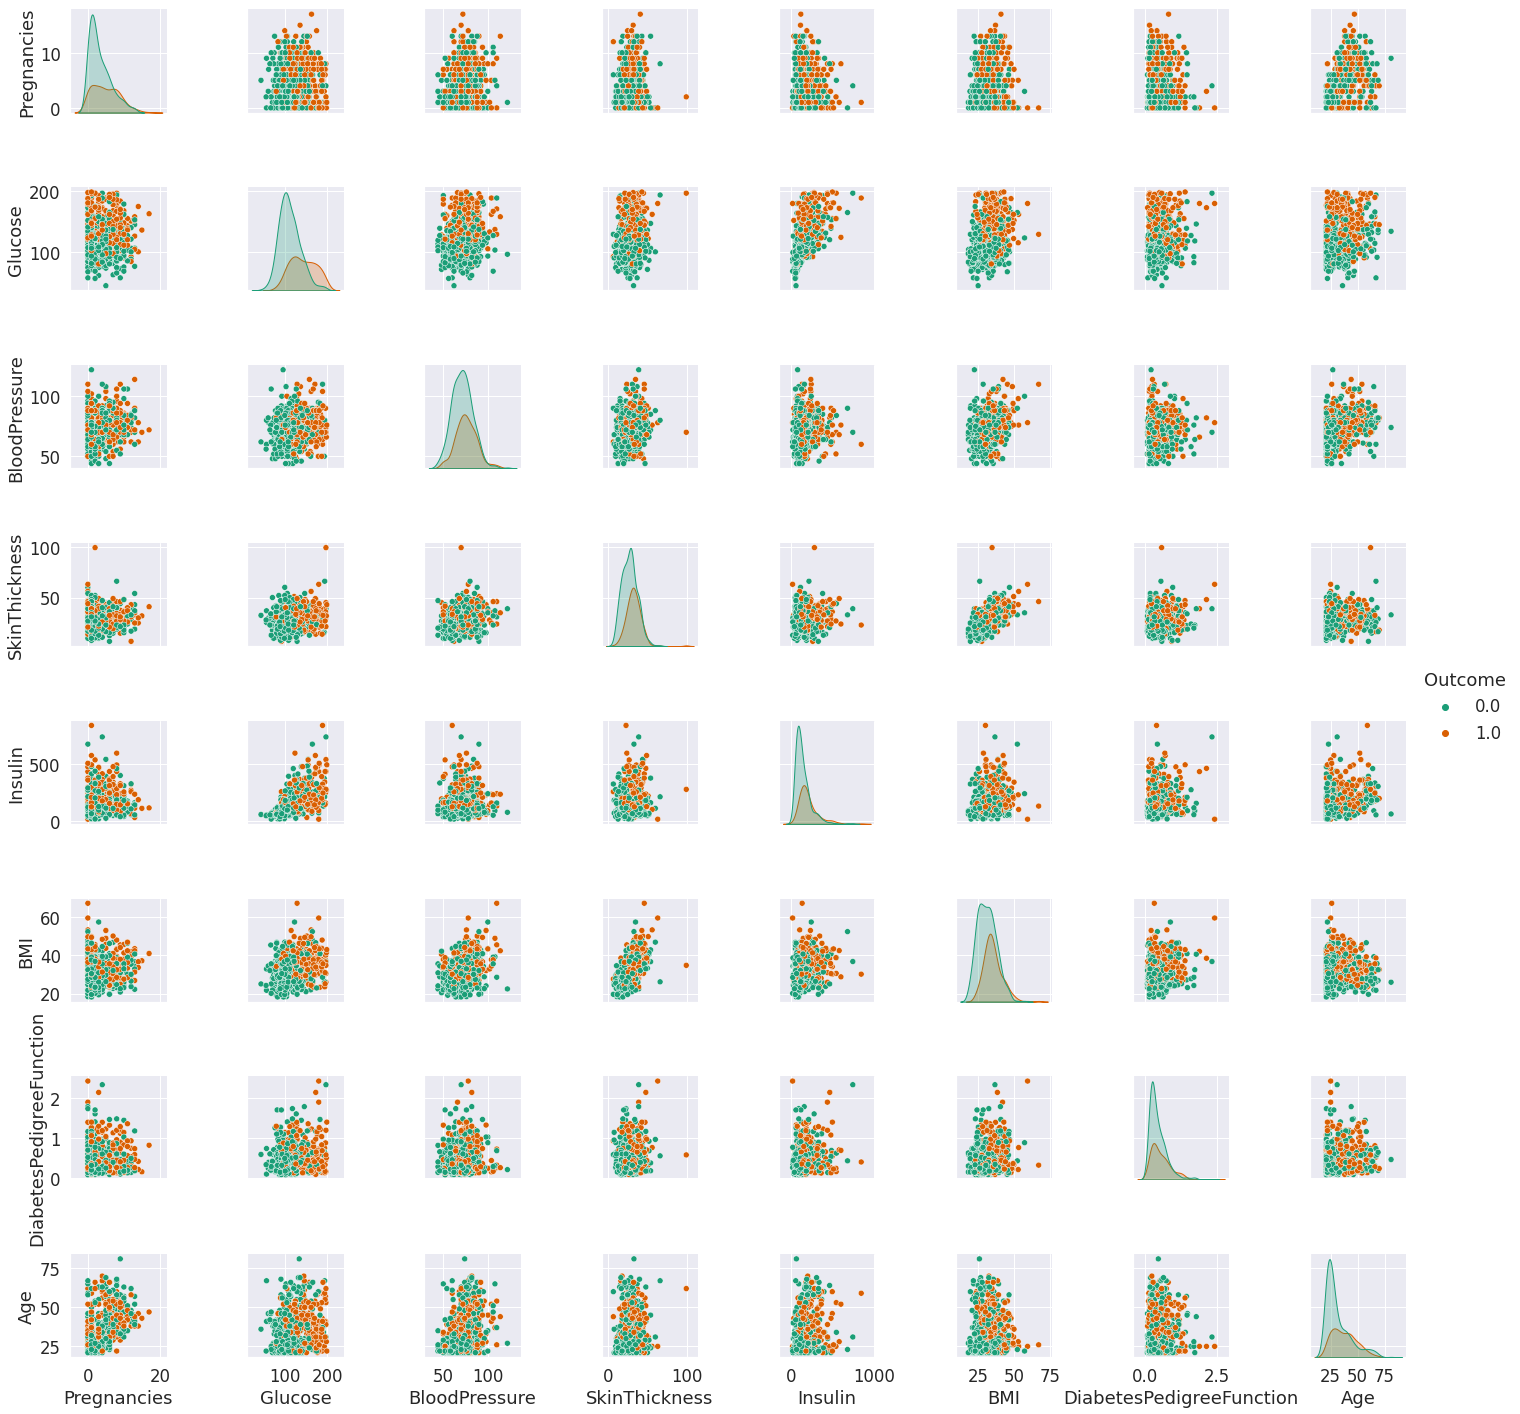

In [ ]:
sns.pairplot(diabetes_df, hue = 'Outcome',palette='Dark2') 

In [ ]:
skewness = diabetes_df.skew(axis= 0)
kurtosis = diabetes_df.kurtosis(axis= 0)
df = {'Kurtosis':[kurtosis],'Skewness':[skewness]}
kurtosis_skewness = pd.DataFrame(kurtosis , columns=['Kurtosis'])
kurtosis_skewness['Skewness'] = skewness
kurtosis_skewness


,Kurtosis,Skewness
Pregnancies,0.156734,0.892433
Glucose,-0.299817,0.522674
BloodPressure,0.503634,0.361034
SkinThickness,3.126259,0.667894
Insulin,5.698029,1.943401
BMI,0.957571,0.581900
DiabetesPedigreeFunction,5.012742,1.832595
Age,0.474383,1.083243
Outcome,-1.565087,0.662759


**Perform correlation relationship.**

---



---



In [ ]:
diabetes_corr = diabetes_df.corr()
diabetes_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.133747,0.200684,0.109849,0.045352,0.018370,-0.025981,0.557151,0.230301
Glucose,0.133747,1.000000,0.218084,0.225371,0.598299,0.230038,0.133491,0.262150,0.489453
BloodPressure,0.200684,0.218084,1.000000,0.241190,0.102824,0.322171,0.012126,0.330645,0.177863
SkinThickness,0.109849,0.225371,0.241190,1.000000,0.202226,0.619132,0.097889,0.146679,0.249324
Insulin,0.045352,0.598299,0.102824,0.202226,1.000000,0.240293,0.142439,0.214948,0.301145
BMI,0.018370,0.230038,0.322171,0.619132,0.240293,1.000000,0.148064,0.021737,0.293754
DiabetesPedigreeFunction,-0.025981,0.133491,0.012126,0.097889,0.142439,0.148064,1.000000,0.017979,0.169660
Age,0.557151,0.262150,0.330645,0.146679,0.214948,0.021737,0.017979,1.000000,0.245921
Outcome,0.230301,0.489453,0.177863,0.249324,0.301145,0.293754,0.169660,0.245921,1.000000


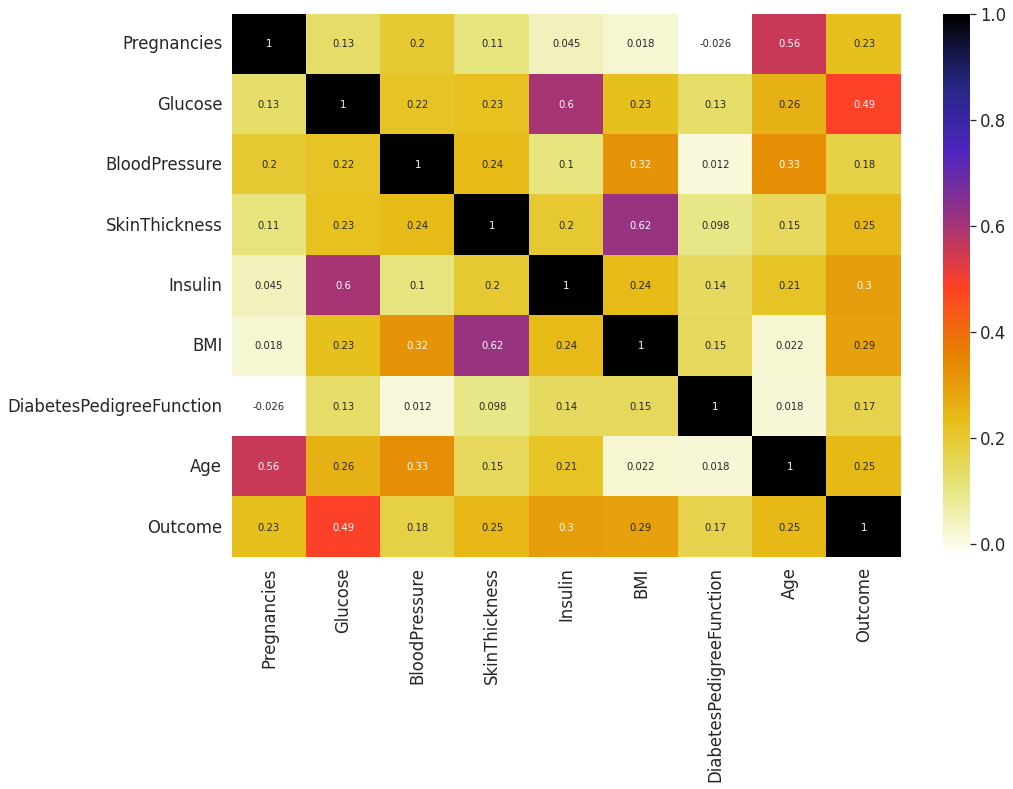

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(diabetes_corr,annot=True,cmap = plt.cm.CMRmap_r)

In [ ]:
diabetes.corr().Outcome.sort_values()

DiabetesPedigreeFunction    0.169660
BloodPressure               0.177863
Pregnancies                 0.230301
Age                         0.245921
SkinThickness               0.252109
BMI                         0.293754
Insulin                     0.302773
Glucose                     0.489453
Outcome                     1.000000
Name: Outcome, dtype: float64

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(diabetes_df.values, i) for i in range(diabetes_df.shape[1])]
vif["features"] = diabetes.columns
vif

,VIF Factor,features
0,3.496855,Pregnancies
1,26.740750,Glucose
2,37.909057,BloodPressure
3,16.329793,SkinThickness
4,5.001132,Insulin
5,38.668109,BMI
6,3.194760,DiabetesPedigreeFunction
7,14.827371,Age
8,1.979187,Outcome


In [ ]:
corr_pairs = diabetes_corr.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
corr_pairs = pd.DataFrame(sorted_pairs)
corr_pairs = corr_pairs.reset_index()
corr_pairs.columns = ['Feature 1','Feature 2','Correlation']
corr_pairs = corr_pairs[corr_pairs['Correlation'] != 1]
corr_pairs.sort_values(by=['Correlation'],ascending= False).drop_duplicates(subset='Correlation').head(10)


,Feature 1,Feature 2,Correlation
71,BMI,SkinThickness,0.619132
69,Glucose,Insulin,0.598299
67,Age,Pregnancies,0.557151
65,Outcome,Glucose,0.489453
63,BloodPressure,Age,0.330645
61,BMI,BloodPressure,0.322171
59,Insulin,Outcome,0.301145
57,BMI,Outcome,0.293754
54,Age,Glucose,0.262150
52,Outcome,SkinThickness,0.249324


According the scatter plot matrix (pair plot) produced which is designed to in such a way that it will show a pair of independent features relationship with the dependent variables, some feature pairs  such as  Glucose , BMI and insulin  produced a distinct cluster between diabetic and non-diabetic population .This can be supported by the finding from the correlation data frame on the heat map. regarding to the diagonal KDE distribution curve some independent features, such as ‘Insulin’ , ‘DiabetesPedigreeFunction’ are significantly skewed  which is support by the finding from kurtosis_skewness  data frame created . we can use data transformation techniques to correct the skewness.

From the corrrelation , hitmap and variance_inflation_factor , there is no significant mulicoliniarity among the features.  Glucose level and BMI are the two with relativly higher correlation  0.5 and 0.31 respectivly, with the target variable(Outcome). With respect to multicoliniarity pregnancy - age (0.54) and BMI - skin thickness (0.54) pairs have relativly significant multicorrelation.

##**Modeling** 


Before that lets try to fix the imbalance data with respect to the target feature .

In [ ]:
pip install-U imbalanced-learn

ERROR: unknown command "install-U" - maybe you meant "install"


In [ ]:
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE

0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


The outcome (Target feature ) is significantly inbalanced , SMOTE method can be used in order to make it balanced by increasing the minority catagory


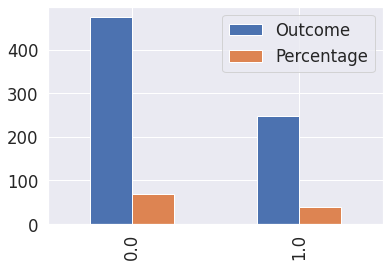

In [ ]:
outcome_df = pd.DataFrame(diabetes_df['Outcome'].value_counts())
outcome_df['Percentage'] = [500/len(diabetes_df['Outcome'])*100,288/len(diabetes['Outcome'])*100]
outcome_df.plot(kind  =  'bar')
print('The outcome (Target feature ) is significantly inbalanced , SMOTE method can be used in order to make it balanced by increasing the minority catagory')

In [ ]:
oversample = SMOTE()
x = diabetes_df.drop('Outcome',axis = 1)
x = x.astype(int)
y = diabetes_df['Outcome'].astype(int)
x_smote,y_smote = oversample.fit_resample(x,y)
x_smote = np.array(x_smote)
diabetes_smote_df = pd.DataFrame(x_smote,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
diabetes_smote_df['Outcome'] = y_smote

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
diabetes_smote_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,4.027368,126.757895,73.332632,29.838947,165.606316,32.535789,0.061053,34.190526,0.500000
std,3.353322,31.569321,11.665829,9.549072,107.138009,6.605414,0.252405,11.434632,0.500263
min,0.000000,44.000000,44.000000,7.000000,14.000000,18.000000,0.000000,21.000000,0.000000
25%,1.000000,102.000000,66.000000,23.000000,92.000000,28.000000,0.000000,25.000000,0.000000
50%,3.000000,122.500000,73.000000,30.000000,140.000000,32.000000,0.000000,31.000000,0.500000
75%,6.000000,148.750000,80.000000,36.000000,202.000000,36.750000,0.000000,42.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.000000,2.000000,81.000000,1.000000


In [ ]:
diabetes_smote_df.shape


(950, 9)

We will make a copy of the cleaned data for the tableau assigment.

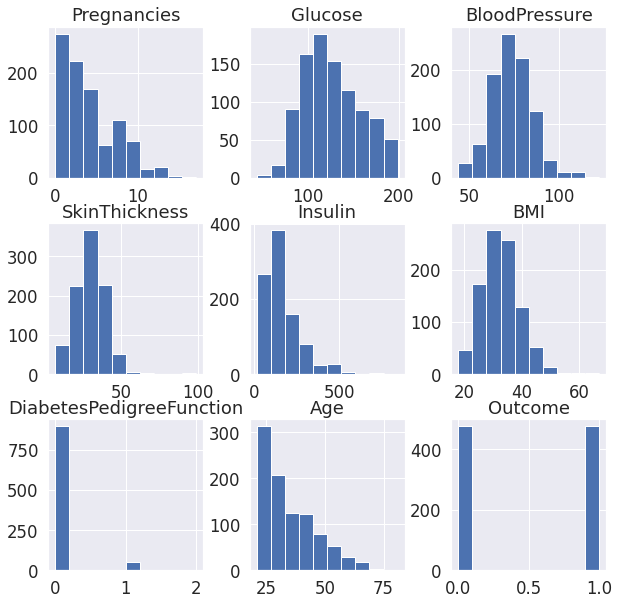

In [ ]:
diabetes_smote_df.hist(figsize = (10,10))
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=42,shuffle = True)

A good add-on to this testing framework is to replace the training/ validation with a cross-validation methodology. This technique is essentially just consisting of training a model and a validation on a random validation dataset multiple times independently. Each repetition is called a fold. A 5-fold cross-validation means that you will train and then validate your model 5 times. This is a good option when you don’t have a big dataset. Cross-validation works well with a smaller validation ratio considering that the multiple folds will cover a large proportion of data points. It also allows you to calculate your performance metric and evaluate the variance between folds. A stable model should have similar performance metrics at every fold. Here is a good article about this technique: https://machinelearningmastery.com k-fold-cross-validation/.

Various appropriate classification algorithm will be used to build a model. In order to compare the models with the results from KNN, we will try to apply some  of the available classification models using pipe method and compare their performance using classification report function , confusion matrix , AUC score and others  . To avoid the bias that can be created due to the difference in units and magnitude which in turn affect the performance of distance and line based models , we will standardize the independent variables.
We will also use validation functionalities (both for the learning and hyperparameter tuning ) to improve the performance since our data is small.

Before going further lets try to find the appropriate number of neighbors we should consider inorder to get better accuracy.


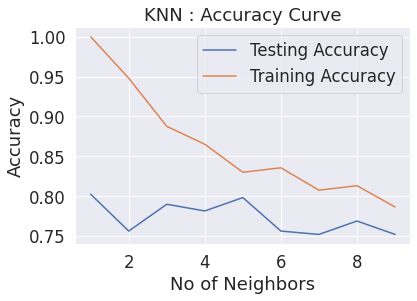

In [ ]:
neighbors = np.arange(1,10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test,y_test)
plt.title('KNN : Accuracy Curve')
plt.plot(neighbors,test_accuracy,label = 'Testing Accuracy')
plt.plot(neighbors,train_accuracy,label = 'Training Accuracy')
plt.xlabel('No of Neighbors')
plt.ylabel('Accuracy')
plt.legend(loc = 'upper right')
plt.show()

Let's train different models with their default configurations and Compare their performance using pipe function.

In [ ]:
ss = StandardScaler()
pipe_knn = Pipeline([('ss',StandardScaler()),
             ('knn',KNeighborsClassifier(4))])
pipe_svm = Pipeline([('ss',StandardScaler()),
             ('svm',SVC())])
pipe_rf = Pipeline([('ss',StandardScaler()),
             ('rf',RandomForestClassifier())])
pipe_gd = Pipeline([('ss',StandardScaler()),
             ('gb',GradientBoostingClassifier())])
pipe_xgb = Pipeline([('ss',StandardScaler()),
             ('xgb',XGBClassifier())])
pipe_lr = Pipeline([('ss',StandardScaler()),
             ('lr',LogisticRegression())])
pipeline_list = [pipe_knn,pipe_svm,pipe_rf,pipe_gd,pipe_xgb,pipe_lr]
pipe_dict = {0:'KNeighborsClassifier',1:'SVC',2:'RandomForestClassifier',
             3:'GradientBoostingClassifier',4:'XGBClassifier',
             5:'LogisticRegression'}

KNeighborsClassifier 
  Accuracy
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       117
           1       0.78      0.71      0.74       121

    accuracy                           0.75       238
   macro avg       0.75      0.75      0.75       238
weighted avg       0.75      0.75      0.75       238
  AUC score 0.75
Accuracy score(test): 0.752 
Accuracy score(train): 0.86
Confusion matrix 
col_0   0   1
row_0        
0      93  24
1      35  86
SVC 
  Accuracy
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       117
           1       0.73      0.80      0.76       121

    accuracy                           0.75       238
   macro avg       0.75      0.75      0.75       238
weighted avg       0.75      0.75      0.75       238
  AUC score 0.75
Accuracy score(test): 0.748 
Accuracy score(train): 0.829
Confusion matrix 
col_0   0   1
row_0        
0      81  36
1      24  97
Ra

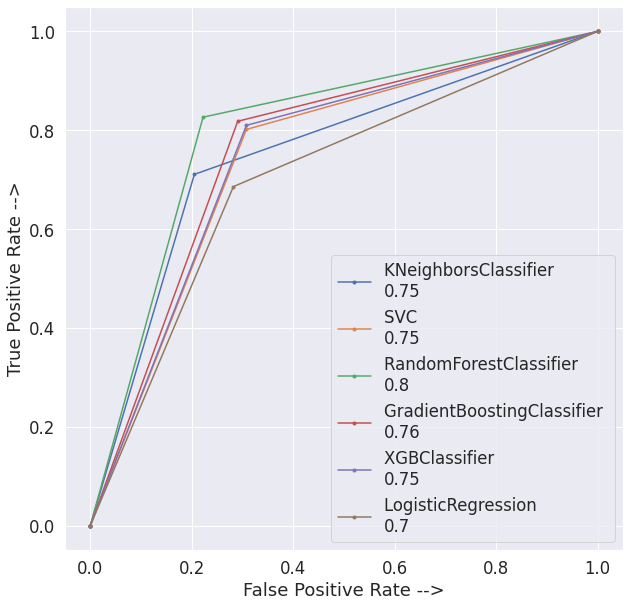

In [ ]:
for i in pipeline_list:
    i.fit(X_train,y_train)
plt.figure(figsize=(10,10))
for i,model in  enumerate(pipeline_list):
     pred_train = model.predict(X_train)
     predict = model.predict(X_test)
     auc = round(metrics.roc_auc_score(y_test,predict),2)
     false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test,predict)
     plt.plot(false_positive_rate, true_positive_rate,linestyle='-', marker='.', label='{} \n{}'.format (pipe_dict[i] , auc))
     plt.xlabel('False Positive Rate -->')
     plt.ylabel('True Positive Rate -->')
     plt.legend()
     print('{} \n  Accuracy\n{}  AUC score {}'.format (pipe_dict[i],classification_report(y_test,predict),auc))
     print('==================================================================================')
     print('Accuracy score(test): {} \nAccuracy score(train): {}'.format (round(accuracy_score(y_test,predict),3),round(accuracy_score(y_train,pred_train),3)))
     print('==================================================================================')
     print('Confusion matrix \n{}'.format (pd.crosstab(y_test,predict)))
     print('==================================================================================')
     
     df = pd.DataFrame([pipe_dict[i],accuracy_score(y_test,predict),accuracy_score(y_train,pred_train),auc])
     df
     


In [ ]:
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [ ]:
hyperparameter_Randomforest = {'max_depth':[None,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'max_features':['auto','sqrt','log2'],
                        'min_samples_split' :[2, 5, 10]}
hyperparameter_GradientBoost = {"n_estimators":[5,50,250,500],
                        "max_depth":[1,3,5,7,9],
                        "learning_rate":[0.01,0.1,1,10,100]}
hyperparameter_KNN = {'n_neighbors' : [4,5],
                      'weights' : ['uniform','distance'],
                      'metric' : ['minkowski','euclidean','manhattan'],
                      'leaf_size': [20,40,1],
                      'p': [1,2]}
hyperparameter_SVM= {'C': [0.1, 1, 10, 100, 1000],
                      'gamma': [1, 0.1, 1e-2, 1e-3, 1e-4, 1e-5],
                      'kernel': ['rbf','sigmoid']}
hyperparameter_xgb = {'n_estimators':[2,5,10,50],
                      'max_depth' : [1,3,10,20],
                      'learning_rate':[0.001,0.01,0.1,0.5],
                      'gamma':[1.0,0.9,0.5,0.1]
                     }

In [ ]:
plt.figure(figsize=(20,20))
cv = StratifiedKFold(n_splits=5, random_state=666, shuffle=True)
def classification_models(estimator,param_grid):
  gsc = GridSearchCV(estimator = estimator ,param_grid = param_grid ,cv=5, n_jobs=1)
  model = gsc.fit(X_train_ss,y_train)
  best_estimator = model.best_estimator_
  predict = best_estimator.predict(X_test_ss)
  auc = round(metrics.roc_auc_score(y_test,predict),2)
  false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test,predict)
  
  #plt.plot(false_positive_rate, true_positive_rate,linestyle='-', marker='.', label='{} \n{}'.format (pipe_dict[i] , auc))
  #plt.xlabel('False Positive Rate -->')
  #plt.ylabel('True Positive Rate -->')
  #plt.legend()
  print('{} \n Accuracy\n{} AUC score {}'.format (estimator,classification_report(y_test,predict),auc))
  print('==================================================================================')
  print('Accuracy score(test): {} \nAccuracy score(train): {}'.format (round(accuracy_score(y_test,predict),3),round(accuracy_score(y_train,pred_train),3)))
  print('==================================================================================')
  print('Confusion matrix \n{}'.format (pd.crosstab(y_test,predict)))
  print('==================================================================================')


<Figure size 1440x1440 with 0 Axes>

In [ ]:
classification_models(KNeighborsClassifier(),hyperparameter_KNN)
classification_models(RandomForestClassifier(),hyperparameter_Randomforest)
classification_models(GradientBoostingClassifier(),hyperparameter_GradientBoost)
classification_models(SVC(),hyperparameter_SVM)
classification_models(XGBClassifier(),hyperparameter_xgb)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 
 Accuracy
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       117
           1       0.77      0.88      0.82       121

    accuracy                           0.81       238
   macro avg       0.81      0.81      0.81       238
weighted avg       0.81      0.81      0.81       238
 AUC score 0.81
Accuracy score(test): 0.807 
Accuracy score(train): 0.729
Confusion matrix 
col_0   0    1
row_0         
0      85   32
1      14  107
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_l

As per mentioned before different classification machine learning models were used both in their default and hyper parameter tuned mode. Different evaluations were used to assess their performance. 
From the finding, there is not that much significant difference among the algorism. In fact, using hyper parameter tuning has not make that much difference with respect to the accuracy.
Due to the fact that the  case is health care related that aim to help  reach  same level of diagnosis, different articles suggested to select models with higher false positive (type 1 error) than false negative (Type 2 error ). This is due to the fact that in most health care diagnosis procedures there is a secondary test called reflex test that uses different methodology to confirm the result. There for whatever false positive result get from any of the algorism with high type 1 error can be confirmed  and hence prevent any undetected positive cases. Putting the above fact , the confusion Metrix and all other performance evaluation metrixs from all algorisms under consideration it can be inferred that KNN both in its default parameters and  with the mentioned hyper parameters can be considered relatively better model.
